look into error analysis 

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
import numpy as np
import os
from sklearn import svm
import matplotlib.pyplot as plt
from random import randint
import pickle


/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def create_df(path):
    list_df = []
    list_files = os.listdir(path)

    path_list = [path + item for item in list_files if item != '.DS_Store']
    path_list.sort()
    for item in path_list:
        print(item)
        temp_df = pd.read_csv(item, low_memory=False)
        list_df.append(temp_df)
    final = pd.concat(list_df)
    return final

def create_equal_representation(df):
    malicious = df.loc[df['malicious'] == 1]

    non_mal = df.loc[df['malicious'] == 0]
    non_mal_sample = non_mal.sample(len(malicious))

    return pd.concat([malicious, non_mal_sample], ignore_index= True)

path = '/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/'

df = create_df(path)

need_name = create_equal_representation(df)

/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x014a113a454d1d20e954243E224f33745353C8ac.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x098b716b8aaf21512996dc57eb0615e2383e2f96.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x3035b2e90D83c1C07C1F8A21e4cb27e8E8A0a00e.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x3E0DeFb880cd8e163baD68ABe66437f99A7A8A74.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x6162759eDAd730152F0dF8115c698a42E666157F.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x629e7Da20197a5429d30da36E77d06CdF796b71A.csv
/Users/matthewschultz/Big_Data_Lab/identity_review/csv_output/single_wallet_history/history_0x711C0139ABA68542A768f24964a801a93500D24D.csv
/Users/matthewschultz/Big_D

(array([619.,  10.,   0.,   2.,   1.,   0.,   1.,   0.,   2.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.]),
 array([    0.        ,  2656.38888889,  5312.77777778,  7969.16666667,
        10625.55555556, 13281.94444444, 15938.33333333, 18594.72222222,
        21251.11111111, 23907.5       , 26563.88888889, 29220.27777778,
        31876.66666667, 34533.05555556, 37189.44444444, 39845.83333333,
        42502.22222222, 45158.61111111, 47815.        , 50471.38888889,
        53127.77777778, 55784.16666667, 58440.55555556, 61096.94444444,
        63753.33333333, 66409.72222222, 69066.11111111, 71722.5       ,
        74378.88888889, 77035.27777778, 79691.66666667, 82348.05555556,
        85004.44444444, 87660.83333333, 90317.22222222, 92973.61111111,
        95630.        ]),
 <BarContainer object of 36 artists>)

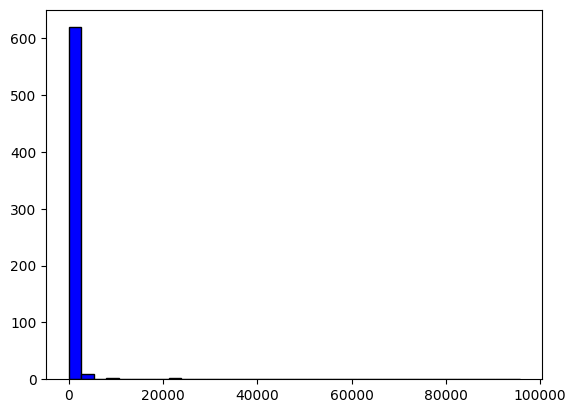

In [5]:
plt.hist(need_name['value'], color = 'blue', edgecolor = 'black',
    bins = int(180/5))

(array([605.,  10.,   7.,   1.,   1.,   1.,   0.,   1.,   1.,   2.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

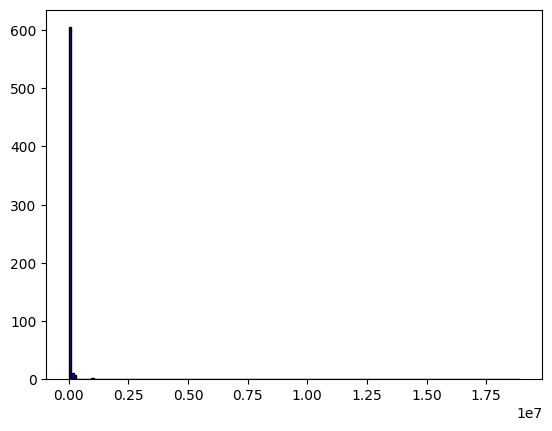

In [6]:
plt.hist(need_name['time_b/w_trans'], color = 'blue', edgecolor = 'black',
    bins = int(180))

Both of the visuals above demonstrate that a large number of data is skewed to the left. This is the most why the random forest model were printing 100% accuarcy when performing a cross validation test. As a result, value and time between transactions need to be normalized to fit the model.



In [18]:
scalar = preprocessing.Normalizer(norm="l2").fit(need_name[['value', 'time_b/w_trans']])
scaled = scalar.transform(need_name[['value', 'time_b/w_trans']])
temp = need_name[['day', 'hour', 'type_of_trans', 'malicious']].to_numpy()

combined = np.concatenate((scaled, temp), axis = 1)


normalized = pd.DataFrame(combined)
normalized = normalized.rename(columns = {
    0: 'value',
    1: 'time_b/w_trans',
    2: 'day',
    3: 'hour',
    4: 'type_of_trans',
    5: 'malicious'
    })

After normalizing the data, we need to recheck the distributions.

(array([313.,   7.,   9.,   7.,   4.,   6.,   6.,  12.,  17., 249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

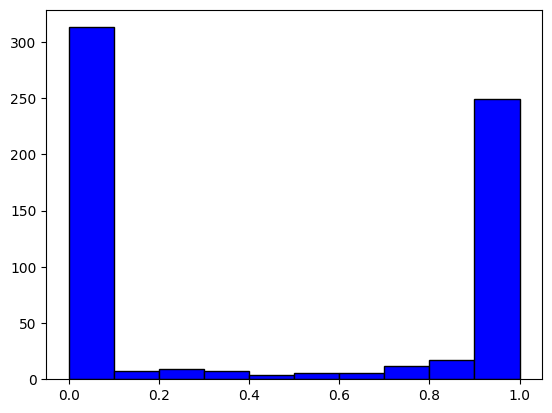

In [19]:
plt.hist(normalized['value'], color = 'blue', edgecolor = 'black')

(array([107.,  55.,  51.,  54.,  24.,  10.,  11.,   7.,   9., 302.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

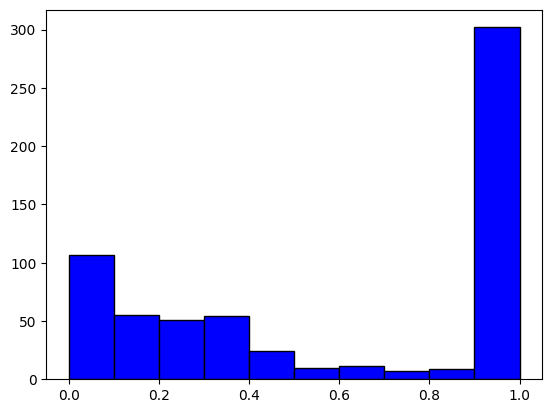

In [20]:
plt.hist(normalized['time_b/w_trans'], color = 'blue', edgecolor = 'black')

In [21]:
X = normalized[['value', 'time_b/w_trans', 'day', 'hour', 'type_of_trans']].to_numpy()
y = normalized['malicious'].to_numpy()


def ensure_equal(x_df, y_df):
    X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.65, random_state = randint(1, 300))
    if len(np.where(y_train == 1)[0]) / len(y_train) < 0.5:
        return ensure_equal(x_df, y_df)
    else:
        return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = ensure_equal(X, y)
    



In [22]:
model = RandomForestClassifier(n_estimators=3, random_state=0)

scores = cross_val_score(model, X, y, cv=10)

print(scores)

[0.65079365 0.84126984 0.96825397 0.98412698 0.98412698 0.98412698
 0.98412698 0.98412698 0.96825397 0.9047619 ]


Compared to the first graph there is much more variation in the score presented by the cross validation test. This well help prove the legitamcy of the model.

In [23]:
fitted_model = model.fit(X_train, y_train)

predict = fitted_model.predict(X_test).tolist()

conf_matrix = confusion_matrix(y_test, predict)

print(conf_matrix)


[[110   1]
 [  7 103]]


Now we will save the file so that I can be used in the NEAT algo

In [24]:
def save_trained_model(model, path):
    list_files = os.listdir(path)
    files = [file for file in list_files if file != '.DS_Store']
    if len(files) == 0:
        file_name = path + "/rand_forest_1.sav"
        pickle.dump(model, open(file_name, 'wb'))
    else:
        file_number = int(files[-1].split("_")[2].split(".")[0]) + 1
        file_name = path + "/rand_forest_{}.sav".format(file_number)
        pickle.dump(model, open(file_name, 'wb'))
        

path_name = '/Users/matthewschultz/Big_Data_Lab/identity_review/iteration_rand_forest'
save_trained_model(fitted_model, path_name)

We also want to save the normalizer so that the results can be reproduced 

In [25]:
pickle.dump(scalar, open("/Users/matthewschultz/Big_Data_Lab/identity_review/normalizer/scalar.save", "wb"))